## 3.4 Classifying movie reviews

(1) 케라스 창시자에게 배우는 딥러닝 도서의 실습 코드 입니다. <br><br>
(2) 코드를 이해한 후, 각 입력창 마다 주석을 추가해 보았습니다. <br><br>
(3) 필요 시 입력 창을 Add 하여 내용을 추가하였습니다.  <br><br>
(4) 번역자의 원 코드가 있는 Github URL은 아래와 같습니다. <br><br>
https://github.com/rickiepark/deep-learning-with-python-notebooks

In [1]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)         # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)  # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

In [11]:
import keras
keras.__version__

'2.3.1'

### 이진 분류 (IMDB)

IMDB는 인터넷 영화 Database 로 부터 가지고 온 양 극단의 리뷰 50000개 로 이루어진 Dataset 입니다. 
- Train Data : 25,000개,  Test Data : 25,000개
- 각각 50%는 긍정, 50%는 부정 리뷰 임
- 데이터는 다음과 같이 전 처리 되어 있음
<br>
(1) 각 리뷰의 단어가 이에 대응하는 숫자로 변환되어 있음 <br>
(2) Train/Test Label은 긍정(1) 과 부정(0) 으로 구분되어 있음 <br>

In [12]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# IMDB data를 train data/label, Test data/label 튜플로 분리
# 리뷰에 나타는 수 많은 단어중에서 가장 자주 나타나는 단어 10,000개만  사용

In [13]:
train_data.shape
test_data.shape
# train_data, test_data 는 각각 25000개의 영화 리뷰로 이루어져 있음

len(train_data[0])
len(train_data[1])
train_data[0]
# 각각의 리뷰(ex. train_data[1])는 여러 단어로 이루어진 list이고, 개별 단어는 전처리를 통해 대응되는 숫자로 변경되어 있음

(25000,)

(25000,)

218

189

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [14]:
train_labels.shape
test_labels.shape
# train_labels, test_labels 는 각각 25000개의 영화리뷰 결과 (부정 : 0,  긍정 : 1)

train_labels[0]
# train_labels[0]의 값은 '0' 이므로, '부정' 임

(25000,)

(25000,)

1

In [15]:
max([max(sequence) for sequence in train_data])
max([max(sequence) for sequence in test_data])

# 가장  자주 등장하는 단어 10,000개로 제한되어 있으므로, train/test data의  숫자(단어를 대응되는 숫자로 전처리)는 0 ~ 9999 의 값 임

9999

9999

#### 전처리된 리뷰(숫자로 구성)를 원 리뷰(영문으로 구성)로 치환

In [17]:
word_index = imdb.get_word_index()
# word_index는 개별 단어와 이 단어에 해당하는 숫자를 맵핑해 놓은 Dictionary 임

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# word_index는 ''단어:숫자" 의 Dictionary 이나, 이를 "숫자:단어" 순으로 순서를 뒤집음

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# for 문을 돌면서 train_data[0]를 구성하는 각 숫자를 이에 맵핑하는 단어로 치환하여 문자열을 구성 함
# 이때 0, 1, 2는 사전 정의된 값(index) 이므로, 해당 갯수(3) 만큼 빼고 치환을 진행
# 가장 자주 등장하는 단어 10,000개 로 제한하였으므로, 이에 해당되지 않는 key(숫자)는 '?' 로 display 됨

In [18]:
len(word_index)
# 단어 index의 갯수는 88584 개 임

word_index.get('dad')
# word_index dictionary에서 dad'의 value는 1243 임

reverse_word_index.get(1243)
# reverse_word_index dictionary에서 1243의 value는 'dad' 임
# word_index와  reverse_word_index의 Data 구조를 확인 할 수 있음

88584

1243

'dad'

In [19]:
decoded_review
# reverse_word_index method를 이용하여 train_data[0]를 구성하는 각 숫자를 이에 맵핑하는 단어로 치환

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=100)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review
# 가장 자주 나타나는 100개의 단어로만 decode 한 경우, 아래와 같이 '?' 가 빈번하게 보임을 확인 할 수 있음

"? this film was just ? ? ? ? story ? ? really ? the ? they ? and you ? just ? ? there ? ? is an ? ? and ? the ? ? ? ? ? ? from the ? ? ? as ? so i ? the ? there was a ? ? with this film the ? ? ? the film were great it was just ? so much that i ? the film as ? as it was ? for ? and would ? it to ? to ? and the ? ? was ? really ? at the ? it was so ? and you ? what they ? if you ? at a film it ? have been good and this ? was also ? to the ? ? ? that ? the ? of ? and ? they were just ? ? are ? ? out of the ? ? i ? because the ? that ? them all ? up are ? a ? ? for the ? film but ? ? are ? and ? be ? for what they have ? don't you ? the ? story was so ? because it was ? and was ? ? ? all that was ? with ? all"

In [20]:
train_data.shape
len(train_data)

(25000,)

25000

In [21]:
import numpy as np

# 전처리 하여 숫자만으로 구성된 리스트를 신경망에 바로 주입 할 수 없으므로, 
# (1)이를 Matrix(2차원 텐서)로 변환
# (2) 각 row(숫자로 구성되어 있는 전처리된 리뷰)의 개별 숫자값을 column 값으로 하여, 해당  (row, column)의 0 값 -> 1 로 변경
def zero_matrix(rows, dimension=10000):
    results = np.zeros((len(rows), dimension))    # Matrix(2차원 텐서)로 변환
    
    for i, col in enumerate(rows):
            results[i, col] = 1.                                       #각  row(숫자로 구성되어 있는 전처리된 리뷰)의 개별 숫자값을 column 값으로 하여, 해당  (row, column)의 0 값 -> 1 로 변경    

    return results

# train_data를 matrix로 변환
x_train = zero_matrix(train_data)

#  test_data를 matrix로 변환
x_test = zero_matrix(test_data)

In [22]:
# x_train, x_test 값 및 shape 확인
print(x_train)   
x_train.shape

print(x_test)   
x_test.shape

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


(25000, 10000)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


(25000, 10000)

In [23]:
# train, test data 확인 
# 각 row 별로 column의 길이가 달랐으나, 각 row 마다 10,000개 컬럼으로 일치화
# 해당  column값에 해당하는 column의 0값 -> 1로 변경 (즉, [2, 34, ....10] -> 2번째 컬럼 1, 34번째 컬럼 1 등으로 변경 함)

#  결과적으로 10000개 단어로 한정하였으므로, column 값은 0 ~9999 이고, 각 row 별 10,000개 column으로 정규화 한 후
# column 값에 해당하는 해당 번째 column을 1로 Set

x_train[0]
x_train[0].shape
x_test[0]
x_test[1].shape

array([0., 1., 1., ..., 0., 0., 0.])

(10000,)

array([0., 1., 1., ..., 0., 0., 0.])

(10000,)

In [24]:
# train_label, test_label 을 data type이 float(부동소수점 수)인 1차원 행렬(vector)로 변환
# 각각 25000개의 영화리뷰 결과 (부정 : 0,  긍정 : 1)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_train
y_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [25]:
# 결과적으로,

# x_train data와 x_test data는 각각 25000개의 row로 이루어진 data이고
# 각 row는 '0'과 '1' 로 이루어진 10000개의 column으로 이루어진 data 임
x_train.shape
x_test.shape

# x_train label과 x_test label은 각각 25000개의 영화리뷰 결과 (부정 : 0,  긍정 : 1) 로 이루어진 Data 임
y_train.shape
y_test.shape

(25000, 10000)

(25000, 10000)

(25000,)

(25000,)

### NN(Neural Network) 모델 생성

In [26]:
from keras import models
from keras import layers

# 앞서와 마찬가지로 선형적으로 쌓는 Sequential 모델을 이용
model = models.Sequential()

# 입력층 : 입력 parameter는 10000이고, 출력 parameter는 16 임, 활성화 함수는 relu
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# 은닉층 : 입력 parameter는 16이고, 출력 parameter는 16 임, 활성화 함수는 relu
model.add(layers.Dense(16, activation='relu'))

# 출력층 : 입력 parameter는 16이고, 출력 parameter는 1 임, 활성화 함수는 sigmoid
# 주로 Binary Classification의 경우는 'Sigmoid', Multi-Classification의 경우는 'Softmax' 활성화 함수 이용
model.add(layers.Dense(1, activation='sigmoid')) 

In [27]:
# compile method를 이용하여 학습 과정을 구성
# 옵티마이저는 Adam을 사용하고, Binary Classification 이므로 손실함수는 'binary_crossentropy'를 사용

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Training & Verification

In [28]:
# 전체 25000 set의 Data에서 검증 Data로 10000 set 을 추출
#  즉 x_train               : 5000 set
#       partial_x_train : 15000 set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
# fit method를 이용해서 정해진 epoch 만큼  Training을 수행
# 이때 Training Data(partial_x_train)과 Validation Data(x_val)을 주입하고, epoch, batch size 지정

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.5759 - accuracy: 0.7448 - val_loss: 0.4267 - val_accuracy: 0.8482
Epoch 2/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.3218 - accuracy: 0.8979 - val_loss: 0.3060 - val_accuracy: 0.8825
Epoch 3/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.2163 - accuracy: 0.9297 - val_loss: 0.2791 - val_accuracy: 0.8889
Epoch 4/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1629 - accuracy: 0.9506 - val_loss: 0.2824 - val_accuracy: 0.8860
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1262 - accuracy: 0.9638 - val_loss: 0.2902 - val_accuracy: 0.8841
Epoch 6/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0976 - accuracy: 0.9750 - val_loss: 0.3093 - val_accuracy: 0.8831
Epoch 7/20
15000/15000 [==============================] - 2s 

In [30]:
model.summary()

#  dense_10 layer의 전체 paramenter의 수는 10000(입력) * 16(출력) + 16 = 160,016 임 (추가적으로 더하는 16은 bias)
#  dense_11 layer의 전체 paramenter의 수는 16 * 16 + 16 = 272 임 (추가적으로 더하는 16은 bias)
#  dense_3 layer의 전체 paramenter의 수는 16 * 1 + 1 = 17 임 (추가적으로 더하는 1은 bias)
# 그러므로 총 paramter의 수는 160,016 + 272 + 17 = 160,305

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Training 시 생성된 정보를 저장하고 있는 history method를 이용하여 모든 val_loss, val_accuracy, loss, accuracy를 확인
history_dict = history.history
history_dict.keys()

history_dict.values()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

dict_values([[0.42666406888961794, 0.30601226983070373, 0.2791227550506592, 0.2824413288116455, 0.29018973217010496, 0.30934581084251406, 0.33408855657577513, 0.3553047766685486, 0.378989625453949, 0.4048480783462524, 0.4313274666309357, 0.45653742032051087, 0.48421209750175476, 0.5082752534866333, 0.5327225749969482, 0.5541212616920471, 0.5746112540245056, 0.5934330225944519, 0.6114479212760925, 0.6288444597244263], [0.8482000231742859, 0.8824999928474426, 0.8888999819755554, 0.8859999775886536, 0.8841000199317932, 0.8830999732017517, 0.8809000253677368, 0.8805000185966492, 0.8799999952316284, 0.8766999840736389, 0.8754000067710876, 0.8744000196456909, 0.8712999820709229, 0.8729000091552734, 0.8725000023841858, 0.871999979019165, 0.8715999722480774, 0.8708000183105469, 0.8705999851226807, 0.8704000115394592], [0.5758965683778127, 0.3217541454792023, 0.21628522926966348, 0.16286624524593354, 0.12623525365193686, 0.09761977179845174, 0.0754757174829642, 0.057003437399864194, 0.040909260

### Graph Visualization

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

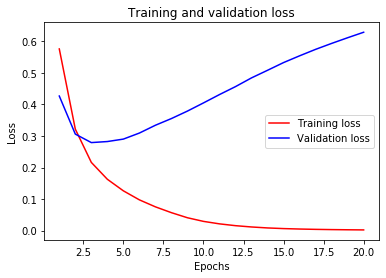

In [36]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

plt.clf()   # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

위의 Graph에서, 학습이 진행되면서 Training loss는 계속 감소하나, Validation loss는 3 epoch가 지나면서 증가함을 확인 할 수 있음 <br>
즉, 해당 모델이 3 epoch 부터 Training Data에 과도하게 최적화 되어 과적합(Overfitting)이 발생함을 알 수 있음

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

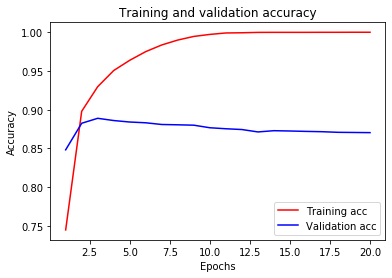

In [33]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

위의 Graph에서, 학습이 진행되면서 Training accuracy는 12 epoch 부터는 거의 1에 가까움 <br>
Validation accuracy는 3 epoch를 지나면서 역시 과적합(Overfitting)에 따라 조금씩 떨어짐을 알 수 있음  <br>

In [34]:
# 과적합 시점을(epoch 3 이후) 알았으니, 앞에서와 동일하게 처음부터 다시 Network를 구성
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


# fit method로 Training 시, epoch = 4로 Setting 하여 과적합 방지
model.fit(x_train, y_train, epochs=4, batch_size=512)

# evaluate method를 이용하여 입력 test data에 대한 loss, accuracy를 계산
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.4949 - accuracy: 0.8047
Epoch 2/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.2527 - accuracy: 0.9114
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.1840 - accuracy: 0.9374
Epoch 4/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.1475 - accuracy: 0.9515


25000/25000 [==============================] - 1s 48us/step


In [35]:
# 약 88%의 정확도로 Movie Review를 정확하게 예측 함을 할 수 있음

print('test_acc : ', accuracy)
print('test_loss : ', loss)

test_acc :  0.8817999958992004
test_loss :  0.3046299138879776
